In [9]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import time
import requests
import datetime as dt
from scipy.stats import gompertz
from dateutil.relativedelta import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Data Analyst/Showbiz

/content/drive/MyDrive/Data Analyst/Showbiz


# Create bar chart race

In [4]:
# Read file csv
df = pd.read_csv('./cleaned_data.csv')
df.head()

,Channel names,Likes,Dislikes,Views,Comments,Title,Category,Date
0,Sơn Tùng M-TP Official,8122.0,47.0,72716.0,628.0,SƠN TÙNG M-TP | LẠC TRÔI MOVINGTOON | CHỦ NHÂN...,Film & Animation,2021-09-01
1,Sơn Tùng M-TP Official,9845.0,131.0,108720.0,549.0,SƠN TÙNG M-TP | LẠC TRÔI MOVINGTOON | CHUNG CƯ...,Film & Animation,2021-09-01
2,Sơn Tùng M-TP Official,10651.0,145.0,122477.0,616.0,SƠN TÙNG M-TP | LẠC TRÔI MOVINGTOON | ĐỪNG HÒN...,Film & Animation,2021-09-01
3,Sơn Tùng M-TP Official,11418.0,138.0,141259.0,614.0,SƠN TÙNG M-TP | LẠC TRÔI MOVINGTOON | VỀ NHÀ |...,Film & Animation,2021-09-01
4,Sơn Tùng M-TP Official,12394.0,193.0,151639.0,719.0,SƠN TÙNG M-TP | LẠC TRÔI MOVINGTOON | GẶP LẠI ...,Film & Animation,2021-08-01


In [5]:
# Convert date
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
channel_names = []
likes = []
dislikes = []
views = []
title = []
date = []
c = 5
month_now = 10
year_now = 2021

for _, row in df.iterrows():
    diff_month = 12 * year_now + month_now - 12 * row['Date'].year - row['Date'].month
    ratios = gompertz(c).cdf(np.linspace(gompertz.ppf(0.01, c),
                                         gompertz.ppf(0.99, c), diff_month + 1))[1:]
    ratios[-1] = 1

    for i, ratio in enumerate(ratios):
        channel_names.append(row['Channel names'])
        likes.append(row['Likes'] * ratio)
        dislikes.append(row['Dislikes'] * ratio)
        views.append(row['Views'] * ratio)
        title.append(row['Title'])
        date.append(row['Date'] + relativedelta(months=i+1))

new_df = pd.DataFrame(data={'Channel names': channel_names,
                            'Likes': likes,
                            'Dislikes': dislikes,
                            'Views': views,
                            'Title': title,
                            'Date': date})

In [ ]:
new_df['Favorite*View'] = (new_df['Likes'] / (new_df['Likes'] + new_df['Dislikes'])) * new_df['Views']
create_feature_dict = {'Favorite*View': 'sum',
                           'Views': 'sum',
                           'Likes': 'sum',
                           'Dislikes': 'sum'}
runbar_df = new_df.groupby(['Channel names', 'Date']).agg(create_feature_dict).reset_index()
runbar_df['Favorite'] = runbar_df['Favorite*View'] / runbar_df['Views']
runbar_df['Date'] = runbar_df['Date'].dt.to_period('M')
runbar_df['Hatred'] = 1 - runbar_df['Favorite']
runbar_df

,Channel names,Date,Favorite*View,Views,Likes,Dislikes,Favorite,Hatred
0,Binz Da Poet,2017-04,4.820649e+03,4.889923e+03,7.963628e+01,1.144393,0.985833,0.014167
1,Binz Da Poet,2017-05,8.732209e+03,8.857693e+03,1.442546e+02,2.072973,0.985833,0.014167
2,Binz Da Poet,2017-06,1.245720e+04,1.263621e+04,2.057908e+02,2.957264,0.985833,0.014167
3,Binz Da Poet,2017-07,1.600196e+04,1.623191e+04,2.643496e+02,3.798768,0.985833,0.014167
4,Binz Da Poet,2017-08,2.781813e+04,2.815504e+04,4.440711e+02,5.459342,0.988034,0.011966
...,...,...,...,...,...,...,...,...
2390,ĐỨC PHÚC OFFICIAL,2021-06,5.093973e+08,5.276381e+08,4.182028e+06,130630.145083,0.965429,0.034571
2391,ĐỨC PHÚC OFFICIAL,2021-07,5.134795e+08,5.318531e+08,4.231620e+06,132028.283551,0.965454,0.034546
2392,ĐỨC PHÚC OFFICIAL,2021-08,5.165417e+08,5.350156e+08,4.267886e+06,133058.192988,0.965470,0.034530
2393,ĐỨC PHÚC OFFICIAL,2021-09,5.191524e+08,5.377053e+08,4.301940e+06,133885.033835,0.965496,0.034504


In [ ]:
pivot_view = pd.pivot_table(runbar_df, values='Views', index=['Channel names'],
                    columns=['Date']).reset_index()
pivot_view.head()

Date,Channel names,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,Binz Da Poet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.878655e+07,2.834998e+07,3.672740e+07,4.454652e+07,5.193213e+07,6.279157e+07,7.251883e+07,8.153394e+07,8.987752e+07,1.001655e+08,1.094489e+08,1.179842e+08,1.260657e+08,1.334495e+08,1.402002e+08,1.463601e+08,1.524275e+08,1.579052e+08,1.630936e+08,1.796286e+08,1.935889e+08,2.058996e+08,2.167108e+08,2.261655e+08,2.343987e+08,2.620481e+08,2.844594e+08,3.031459e+08,3.223896e+08,3.450306e+08,3.629670e+08,3.770869e+08,3.880707e+08,4.098818e+08,4.248835e+08,4.350923e+08,4.418834e+08,4.463269e+08,4.492132e+08,455651918.0
1,BÍCH PHƯƠNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839059e+06,3.459062e+06,4.986730e+06,6.467906e+06,8.020542e+06,9.519668e+06,1.096577e+07,...,2.372468e+08,2.510977e+08,2.641275e+08,2.763293e+08,2.883996e+08,3.011387e+08,3.303128e+08,3.557746e+08,3.793659e+08,4.011738e+08,4.213012e+08,4.398468e+08,4.569061e+08,4.725716e+08,4.985857e+08,5.214141e+08,5.423940e+08,5.620317e+08,5.797399e+08,6.052743e+08,6.274721e+08,6.471859e+08,6.646356e+08,7.004260e+08,7.335198e+08,7.617626e+08,7.874234e+08,8.090761e+08,8.287557e+08,8.451010e+08,8.592850e+08,8.708952e+08,8.803872e+08,8.880862e+08,8.943446e+08,9.031885e+08,9.103321e+08,9.150220e+08,9.182005e+08,929763479.0
2,Bình Gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.424626e+06,9.450339e+06,1.474404e+07,1.999995e+07,2.484393e+07,2.933011e+07,3.347805e+07,3.764667e+07,4.145809e+07,4.496272e+07,4.817941e+07,5.265433e+07,5.662062e+07,6.022762e+07,6.592943e+07,7.090476e+07,7.537211e+07,7.937148e+07,8.294117e+07,8.611764e+07,9.024596e+07,9.380027e+07,9.690363e+07,9.960213e+07,1.087041e+08,1.160204e+08,1.220528e+08,1.269815e+08,1.309723e+08,1.341745e+08,1.378666e+08,1.406515e+08,1.427448e+08,1.443023e+08,1.454525e+08,1.462986e+08,1.469207e+08,148868458.0
3,Chi Dân,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.578009e+04,3.198609e+04,4.686887e+04,6.127721e+04,7.522180e+04,8.871325e+04,1.017621e+05,...,9.105364e+07,9.688487e+07,1.023568e+08,1.076158e+08,1.125791e+08,1.172159e+08,1.215477e+08,1.263535e+08,1.308141e+08,1.349550e+08,1.388460e+08,1.424488e+08,1.462672e+08,1.497530e+08,1.550239e+08,1.596901e+08,1.639424e+08,1.681269e+08,1.723468e+08,1.761271e+08,1.795615e+08,1.826434e+08,1.854898e+08,1.882160e+08,1.912225e+08,1.940719e+08,1.965450e+08,1.986929e+08,2.005525e+08,2.021580e+08,2.035406e+08,2.047285e+08,2.078112e+08,2.100828e+08,2.117698e+08,2.130152e+08,2.142842e+08,2.151274e+08,2.162851e+08,218991439.0
4,Chi Pu Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17237.98912,30017.576181,49554.956915,111564.650542,161780.639629,210643.707065,258179.51966,304413.570914,353701.146561,400671.666444,446322.892717,490681.414697,618081.430298,724023.208899,826843.485487,926607.846648,1.023381e+06,1.117228e+06,1.212174e+06,1.303409e+06,1.391810e+06,1.477441e+06,1.560366e+06,1.654189e+06,...,7.328726e+07,8.051251e+07,8.727928e+07,9.361383e+07,9.953427e+07,

In [ ]:
pivot_view.to_csv('./pivot_view.csv', index=False)

# Favorite and Hatred

In [ ]:
new_df.dropna(inplace=True)
new_df['Favorite*View'] = (new_df['Likes'] / (new_df['Likes'] + new_df['Dislikes'])) * new_df['Views']
create_feature_dict = {'Favorite*View': 'sum',
                           'Views': 'sum',
                           'Likes': 'sum',
                           'Dislikes': 'sum'}
runbar_df = new_df.groupby(['Channel names', 'Date']).agg(create_feature_dict).reset_index()
runbar_df['Favorite'] = runbar_df['Favorite*View'] / runbar_df['Views']
runbar_df['Date'] = runbar_df['Date'].dt.to_period('M')
runbar_df['Hatred'] = 1 - runbar_df['Favorite']
runbar_df

,Channel names,Date,Favorite*View,Views,Likes,Dislikes,Favorite,Hatred
0,Binz Da Poet,2017-04,4.820649e+03,4.889923e+03,7.963628e+01,1.144393,0.985833,0.014167
1,Binz Da Poet,2017-05,8.732209e+03,8.857693e+03,1.442546e+02,2.072973,0.985833,0.014167
2,Binz Da Poet,2017-06,1.245720e+04,1.263621e+04,2.057908e+02,2.957264,0.985833,0.014167
3,Binz Da Poet,2017-07,1.600196e+04,1.623191e+04,2.643496e+02,3.798768,0.985833,0.014167
4,Binz Da Poet,2017-08,2.781813e+04,2.815504e+04,4.440711e+02,5.459342,0.988034,0.011966
...,...,...,...,...,...,...,...,...
2390,ĐỨC PHÚC OFFICIAL,2021-06,5.093973e+08,5.276381e+08,4.182028e+06,130630.145083,0.965429,0.034571
2391,ĐỨC PHÚC OFFICIAL,2021-07,5.134795e+08,5.318531e+08,4.231620e+06,132028.283551,0.965454,0.034546
2392,ĐỨC PHÚC OFFICIAL,2021-08,5.165417e+08,5.350156e+08,4.267886e+06,133058.192988,0.965470,0.034530
2393,ĐỨC PHÚC OFFICIAL,2021-09,5.191524e+08,5.377053e+08,4.301940e+06,133885.033835,0.965496,0.034504


In [ ]:
pivot_favorite = pd.pivot_table(runbar_df, values='Favorite', index=['Channel names'],
                    columns=['Date']).reset_index()
pivot_favorite.head()

Date,Channel names,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,Binz Da Poet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.979204,0.978670,0.978442,0.978306,0.978227,0.978383,0.978473,0.978538,0.978585,0.978533,0.978503,0.978480,0.978483,0.978484,0.978485,0.978485,0.978486,0.978488,0.978501,0.978727,0.978884,0.979003,0.979096,0.979169,0.979226,0.977692,0.976695,0.975987,0.975416,0.974865,0.974489,0.974223,0.974034,0.974128,0.974172,0.974190,0.974194,0.974191,0.974186,0.974181
1,BÍCH PHƯƠNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.938231,0.938783,0.938908,0.938982,0.939255,0.939492,0.939644,...,0.957924,0.957465,0.957084,0.956761,0.956464,0.956147,0.948653,0.943371,0.939132,0.935673,0.932815,0.930428,0.928417,0.926713,0.925166,0.923902,0.922871,0.922062,0.921382,0.921061,0.920778,0.920539,0.920336,0.921515,0.922634,0.923484,0.924228,0.924797,0.925322,0.925718,0.926060,0.926313,0.926501,0.926637,0.926736,0.926966,0.927158,0.927254,0.927297,0.927314
2,Bình Gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.928613,0.942459,0.944869,0.946405,0.947216,0.947726,0.948076,0.948568,0.948915,0.949181,0.949389,0.950144,0.950686,0.951113,0.951318,0.951481,0.951609,0.951710,0.951792,0.951858,0.952317,0.952661,0.952934,0.953152,0.953392,0.953561,0.953684,0.953776,0.953845,0.953897,0.953684,0.953550,0.953466,0.953416,0.953389,0.953375,0.953370,0.953368
3,Chi Dân,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974862,0.975550,0.975693,0.975766,0.975809,0.975838,0.975859,...,0.955593,0.955741,0.955864,0.955991,0.956110,0.956210,0.956295,0.956462,0.956610,0.956737,0.956856,0.956958,0.957137,0.957286,0.957592,0.957839,0.958049,0.958269,0.958516,0.958723,0.958903,0.959056,0.959196,0.959333,0.959520,0.959703,0.959853,0.959975,0.960074,0.960154,0.960219,0.960270,0.960492,0.960642,0.960744,0.960812,0.960906,0.960956,0.961066,0.961092
4,Chi Pu Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89601,0.89601,0.905531,0.913983,0.915968,0.916991,0.917615,0.918034,0.919055,0.919672,0.920147,0.920524,0.926941,0.930214,0.932588,0.934386,0.935795,0.936927,0.937952,0.938785,0.939487,0.940087,0.940604,0.940983,...,0.761172,0.759637,0.758426,0.757457,0.756663,0.756158,0.756543,0.757077,0.757486,0.758153,0.773533,0.784338,0.792502,0.799437,0.805397,0.810101,0.813898,0.817230,0.821986,0.826039,0.829295,0.831955,0.834248,0.836233,0.839342,0.841801,0.843809,0.845919,0.847671,0.849045,0.850115,0.850923,0.851545,0.852019,0.852378,0.852646,0.852843,0.852985,0.853106,0.853179


In [ ]:
pivot_favorite.to_csv('./pivot_favorite.csv', index=False)

In [ ]:
pivot_hatred = pd.pivot_table(runbar_df, values='Hatred', index=['Channel names'],
                    columns=['Date']).reset_index()
pivot_hatred.head()

Date,Channel names,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,Binz Da Poet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020796,0.021330,0.021558,0.021694,0.021773,0.021617,0.021527,0.021462,0.021415,0.021467,0.021497,0.021520,0.021517,0.021516,0.021515,0.021515,0.021514,0.021512,0.021499,0.021273,0.021116,0.020997,0.020904,0.020831,0.020774,0.022308,0.023305,0.024013,0.024584,0.025135,0.025511,0.025777,0.025966,0.025872,0.025828,0.025810,0.025806,0.025809,0.025814,0.025819
1,BÍCH PHƯƠNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061769,0.061217,0.061092,0.061018,0.060745,0.060508,0.060356,...,0.042076,0.042535,0.042916,0.043239,0.043536,0.043853,0.051347,0.056629,0.060868,0.064327,0.067185,0.069572,0.071583,0.073287,0.074834,0.076098,0.077129,0.077938,0.078618,0.078939,0.079222,0.079461,0.079664,0.078485,0.077366,0.076516,0.075772,0.075203,0.074678,0.074282,0.073940,0.073687,0.073499,0.073363,0.073264,0.073034,0.072842,0.072746,0.072703,0.072686
2,Bình Gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.071387,0.057541,0.055131,0.053595,0.052784,0.052274,0.051924,0.051432,0.051085,0.050819,0.050611,0.049856,0.049314,0.048887,0.048682,0.048519,0.048391,0.048290,0.048208,0.048142,0.047683,0.047339,0.047066,0.046848,0.046608,0.046439,0.046316,0.046224,0.046155,0.046103,0.046316,0.046450,0.046534,0.046584,0.046611,0.046625,0.046630,0.046632
3,Chi Dân,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025138,0.024450,0.024307,0.024234,0.024191,0.024162,0.024141,...,0.044407,0.044259,0.044136,0.044009,0.043890,0.043790,0.043705,0.043538,0.043390,0.043263,0.043144,0.043042,0.042863,0.042714,0.042408,0.042161,0.041951,0.041731,0.041484,0.041277,0.041097,0.040944,0.040804,0.040667,0.040480,0.040297,0.040147,0.040025,0.039926,0.039846,0.039781,0.039730,0.039508,0.039358,0.039256,0.039188,0.039094,0.039044,0.038934,0.038908
4,Chi Pu Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10399,0.10399,0.094469,0.086017,0.084032,0.083009,0.082385,0.081966,0.080945,0.080328,0.079853,0.079476,0.073059,0.069786,0.067412,0.065614,0.064205,0.063073,0.062048,0.061215,0.060513,0.059913,0.059396,0.059017,...,0.238828,0.240363,0.241574,0.242543,0.243337,0.243842,0.243457,0.242923,0.242514,0.241847,0.226467,0.215662,0.207498,0.200563,0.194603,0.189899,0.186102,0.182770,0.178014,0.173961,0.170705,0.168045,0.165752,0.163767,0.160658,0.158199,0.156191,0.154081,0.152329,0.150955,0.149885,0.149077,0.148455,0.147981,0.147622,0.147354,0.147157,0.147015,0.146894,0.146821


In [ ]:
pivot_hatred.to_csv('./pivot_hatred.csv', index=False)

# Analysis

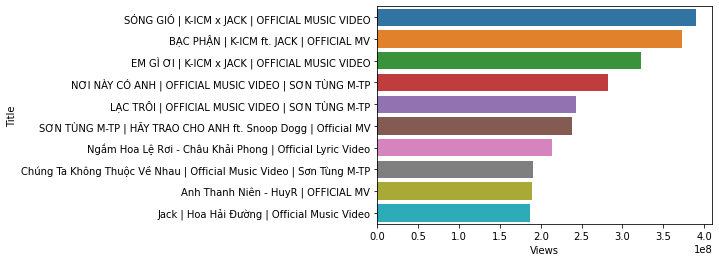

In [16]:
top_view = df.sort_values(by=['Views'], ascending=False)[:10]
sns.barplot(x=top_view['Views'], y=top_view['Title'])
plt.xtic

In [6]:
# Calculate favorite
df['Favorite'] = df['Likes'] / (df['Likes'] + df['Dislikes'])
df['Chatty'] = df['Comments'] / (df['Likes'] + df['Dislikes'])
df.dropna(subset=['Likes'], inplace=True)

In [12]:
# Top 10 most favorite channels
def weighted_average(x): 
   return np.average(x['Favorite'] ,weights=x['Views'])

top_favorite = df.groupby(['Channel names']).apply(func = weighted_average).sort_values(ascending=False)[:10]
top_favorite

Channel names
Phan Mạnh Quỳnh Official     0.979440
Đen Vâu Official             0.978510
Binz Da Poet                 0.974181
KARIK                        0.973507
JustaTeeMusic                0.971999
Dế Choắt                     0.971996
Hà Anh Tuấn                  0.971758
Hương Giang Entertainment    0.970238
Wowy                         0.970030
Masew                        0.969980
dtype: float64

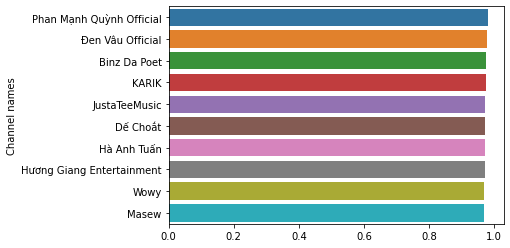

In [13]:
sns.barplot(x=top_favorite.values, y=top_favorite.index)

In [14]:
# Top 10 liked songs > 1M views
top_liked = df[df['Views'] > 1000000].sort_values(by='Favorite', ascending=False)[:10]
top_liked

,Channel names,Likes,Dislikes,Views,Comments,Title,Category,Date,Favorite,Chatty
824,Binz Da Poet,90416.0,355.0,2779550.0,2245.0,Binz và Mẹ Song Ca Người Hãy Quên Em Đi,Music,2018-04-01,0.996089,0.024733
1671,Phan Mạnh Quỳnh Official,111125.0,524.0,1836458.0,5397.0,Miền Gian Khổ | Phan Mạnh Quỳnh | Official Mus...,Music,2020-11-01,0.995307,0.048339
1756,Hương Giang Entertainment,57625.0,318.0,1330258.0,5641.0,Tặng Anh Cho Cô Ấy (ADODDA4) Official Teaser -...,Music,2020-02-01,0.994512,0.097354
2468,Dế Choắt,96070.0,642.0,2432857.0,3324.0,EM RƠI TỪ ĐÂU XUỐNG ĐÂY - DẾ CHOẮT | OFFICIAL MV,Entertainment,2021-01-01,0.993362,0.034370
1667,Phan Mạnh Quỳnh Official,124223.0,896.0,4543490.0,6915.0,"Gặp gỡ, Yêu đương và Được bên em | Phan Mạnh Q...",Music,2021-08-01,0.992839,0.055267
788,Binz Da Poet,50486.0,372.0,1332110.0,1094.0,Touliver x Binz - 'BIGCITYBOI' (International ...,Music,2020-07-01,0.992686,0.021511
336,Đen Vâu Official,42732.0,318.0,3197197.0,1249.0,"Hát cho đời và hát cho em - Thơm, Đen, Long, Thỏ",Music,2015-08-01,0.992613,0.029013
452,Masew,40068.0,305.0,1654113.0,1085.0,Nhất Thân - Masew x Khoi Vu,Music,2021-08-01,0.992445,0.026874
789,Binz Da Poet,148380.0,1159.0,7751567.0,3910.0,Cho Mình Em - Binz,Music,2020-07-01,0.992250,0.026147
1762,Hương Giang Entertainment,63316.0,503.0,1407438.0,2909.0,Hương Giang ft Chấn Quốc - Mẹ Ơi Đừng Khóc | O...,Music,2019-10-01,0.992118,0.045582


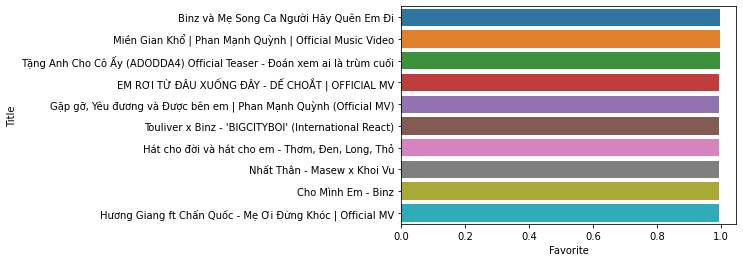

In [15]:
sns.barplot(x=top_liked['Favorite'], y=top_liked['Title'])

In [17]:
# Top 10 liked and disliked songs > 1M views
top_dislike = df[df['Views'] > 1000000].sort_values(by='Favorite')[:10]
top_dislike

,Channel names,Likes,Dislikes,Views,Comments,Title,Category,Date,Favorite,Chatty
2375,HuyR,118958.0,275958.0,5573456.0,41109.0,Sài Gòn Của Anh - K-ICM x HuyR | OFFICIAL MV,Music,2020-02-01,0.301224,0.104096
175,K-ICM Official,79983.0,94575.0,4570391.0,19839.0,AI MANG EM ĐI | K-ICM FT. APJ (#AMCDD3) | OFFI...,Music,2020-09-01,0.458203,0.113653
2123,Chi Pu Official,328639.0,283051.0,23135213.0,60997.0,Chi Pu | TỪ HÔM NAY (Feel Like Ooh) - Official...,Entertainment,2017-10-01,0.537264,0.099719
3983,Hương Tràm Phạm Charmy Pham,38717.0,30064.0,4263966.0,8868.0,Hương Tràm - I Want You Now (Official MV 4K) |...,Music,2017-12-01,0.562903,0.128931
154,K-ICM Official,10640.0,7060.0,1120285.0,4198.0,MỘT LẦN CHO MÃI MÃI - K-ICM | OFFICIAL MUSIC V...,Music,2021-06-01,0.601130,0.237175
2110,Chi Pu Official,234707.0,131317.0,24165359.0,41308.0,Chi Pu | EM SAI RỒI ANH XIN LỖI EM ĐI (#ESRAXL...,Entertainment,2017-11-01,0.641234,0.112856
173,K-ICM Official,87457.0,47190.0,6080181.0,12664.0,XIN CÔ ĐƠN ĐI | K-ICM FT. APJ (#AMCDD2) | OFFI...,Music,2020-11-01,0.649528,0.094053
170,K-ICM Official,69981.0,36037.0,3430004.0,6129.0,LIẾC MẮT ĐƯA TÌNH - K-ICM FT. LENA (MV này rất...,Music,2020-12-01,0.660086,0.057811
2119,Chi Pu Official,20219.0,9930.0,1320086.0,2052.0,Chi Pu | CHO TA GẦN HƠN (I'm In Love) - MV Tea...,Music,2017-10-01,0.670636,0.068062
2117,Chi Pu Official,199632.0,86167.0,13023066.0,28855.0,Chi Pu | CHO TA GẦN HƠN (I'm In Love) - OFFICI...,Entertainment,2017-10-01,0.698505,0.100963


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54392 missing from current font.
  font.set_text(s, 0, flags=flags)


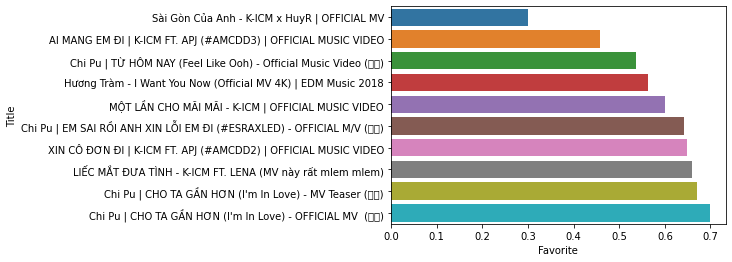

In [18]:
sns.barplot(x=top_dislike['Favorite'], y=top_dislike['Title'])

In [19]:
# Top 10 chatty songs > 1M views
top_chatty = df[df['Views'] > 1000000].sort_values(by='Chatty', ascending=False)[:10]
top_chatty

,Channel names,Likes,Dislikes,Views,Comments,Title,Category,Date,Favorite,Chatty
1348,Đàm Vĩnh Hưng,16386.0,443.0,3775747.0,24973.0,Je T'aime - Đàm Vĩnh Hưng | Official MV | Vũ t...,Music,2020-10-01,0.973676,1.483927
129,J97,1223195.0,121662.0,46145360.0,1000923.0,Jack | LAYLALAY | Official Music Video,Music,2021-04-01,0.909535,0.744260
23,Sơn Tùng M-TP Official,2366368.0,75374.0,129125989.0,1632365.0,SƠN TÙNG M-TP | MUỘN RỒI MÀ SAO CÒN | OFFICIAL...,Music,2021-04-01,0.969131,0.668525
135,J97,2622414.0,139170.0,187014697.0,1732302.0,Jack | Hoa Hải Đường | Official Music Video,Music,2020-09-01,0.949605,0.627286
142,J97,3186289.0,165964.0,163873155.0,2004143.0,JACK - Là 1 Thằng Con Trai Official MV | J97,Music,2020-03-01,0.950492,0.597850
132,J97,2083266.0,130850.0,121233311.0,1191581.0,Jack | Đom Đóm | Official Music Video,Music,2020-12-01,0.940902,0.538175
61,Sơn Tùng M-TP Official,1693031.0,237790.0,142847895.0,1003457.0,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Music,2018-05-01,0.876845,0.519705
158,K-ICM Official,35614.0,10915.0,2501199.0,23378.0,CÔ ĐỘC | K-ICM x ZINO | M/V Performance,Music,2021-05-01,0.765415,0.502439
138,J97,290199.0,7832.0,3624574.0,149390.0,Jack đã sẵn sàng viết câu chuyện của...,Music,2020-08-01,0.973721,0.501257
33,Sơn Tùng M-TP Official,2153717.0,193539.0,84686106.0,1173700.0,SƠN TÙNG M-TP | CHÚNG TA CỦA HIỆN TẠI | OFFICI...,Music,2020-12-01,0.917547,0.500031
